In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\User\Downloads\segmentation_data.csv')


In [22]:
df.shape

(2000, 7)

In [2]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
df.drop('ID', axis = 1, inplace = True)

In [4]:
#Transformando a variável 'covid_res' em dummy 
df1 = pd.get_dummies(data=df, columns=['Education','Occupation','Settlement size'], drop_first=False)
df1.columns

Index(['Sex', 'Marital status', 'Age', 'Income', 'Education_0', 'Education_1',
       'Education_2', 'Education_3', 'Occupation_0', 'Occupation_1',
       'Occupation_2', 'Settlement size_0', 'Settlement size_1',
       'Settlement size_2'],
      dtype='object')

In [5]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['Age', 'Income']
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [6]:
df1.head()

,Sex,Marital status,Age,Income,Education_0,Education_1,Education_2,Education_3,Occupation_0,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2
0,0,0,0.844828,0.324781,0,0,1,0,0,1,0,0,0,1
1,1,1,0.068966,0.420210,0,1,0,0,0,1,0,0,0,1
2,0,0,0.534483,0.195144,0,1,0,0,1,0,0,1,0,0
3,0,0,0.465517,0.496223,0,1,0,0,0,1,0,0,1,0
4,0,0,0.603448,0.413842,0,1,0,0,0,1,0,0,1,0


In [11]:
from sklearn.cluster import KMeans
model = KMeans(random_state=42)

In [12]:
from yellowbrick.cluster import KElbowVisualizer

In [13]:
visualizer = KElbowVisualizer(model, k=(2,10))

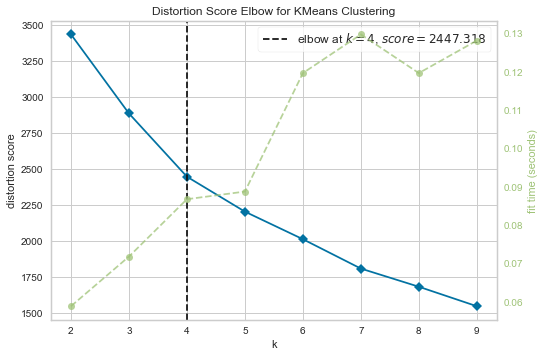

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
visualizer.fit(df1)        # Fit the data to the visualizer
visualizer.show()  

In [15]:
df2 = df1.copy()
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df2)
y_predicted

array([0, 2, 1, ..., 1, 1, 1])

In [16]:
df2['cluster']=y_predicted
df2.head()

,Sex,Marital status,Age,Income,Education_0,Education_1,Education_2,Education_3,Occupation_0,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2,cluster
0,0,0,0.844828,0.324781,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0.068966,0.420210,0,1,0,0,0,1,0,0,0,1,2
2,0,0,0.534483,0.195144,0,1,0,0,1,0,0,1,0,0,1
3,0,0,0.465517,0.496223,0,1,0,0,0,1,0,0,1,0,3
4,0,0,0.603448,0.413842,0,1,0,0,0,1,0,0,1,0,3


In [19]:
gpby=df2.groupby("cluster").mean().reset_index()
gpby.head()

,cluster,Sex,Marital status,Age,Income,Education_0,Education_1,Education_2,Education_3,Occupation_0,Occupation_1,Occupation_2,Settlement size_0,Settlement size_1,Settlement size_2
0,0,0.457778,0.693333,0.635479,0.466953,0.000000,0.000000,0.906667,0.093333,0.048889,0.626667,0.324444,0.137778,0.457778,0.404444
1,1,0.595674,0.507488,0.288341,0.195380,0.148087,0.695507,0.144759,0.011647,0.993344,0.000000,0.006656,0.983361,0.004992,0.011647
2,2,0.855787,0.884250,0.190440,0.307171,0.017078,0.967742,0.000000,0.015180,0.000000,0.952562,0.047438,0.497154,0.368121,0.134725
3,3,0.003091,0.102009,0.310531,0.367895,0.292117,0.707883,0.000000,0.000000,0.038640,0.726430,0.234930,0.162287,0.377125,0.460587


In [24]:
polar=pd.melt(gpby,id_vars=["cluster"])
polar.head()

,cluster,variable,value
0,0,Sex,0.457778
1,1,Sex,0.595674
2,2,Sex,0.855787
3,3,Sex,0.003091
4,0,Marital status,0.693333


In [23]:
import plotly.express as px
gpby=df2.groupby("cluster").mean().reset_index()
polar=pd.melt(gpby,id_vars=["cluster"])
plot = px.line_polar(polar, r="value", theta="variable", color="cluster", line_close=True,height=500,width=900)
plot.show()